## What is airflow 
Airflow allows users to define, schedule, and monitor workflows as Directed Acyclic Graphs (DAGs), which are collections of tasks with dependencies between them.

**DAGs (Directed Acyclic Graphs):**

- In Airflow, workflows are represented as Directed Acyclic Graphs (DAGs).
- DAGs consist of tasks and dependencies between them.
- Tasks represent individual units of work to be executed.

**Operators:**
- Tasks within a DAG are implemented using Operators.
- Operators define what actually gets done by each task.
- There are various built-in operators for common tasks like BashOperator for executing bash commands, PythonOperator for executing Python functions, etc.
- You can also define custom operators to suit your specific needs.


**Schedulers:**
- Aas a scheduler component that orchestrates the execution of tasks based on their dependencies and schedule.
- It continuously monitors all tasks and triggers the execution of tasks that are ready to run.

**Executors:**
- Executors determine how tasks are executed.
- The most common executor is the SequentialExecutor, which runs tasks sequentially in a single process.
- Other executors like LocalExecutor, CeleryExecutor, or KubernetesExecutor allow for distributed task execution.



### Tasks different states

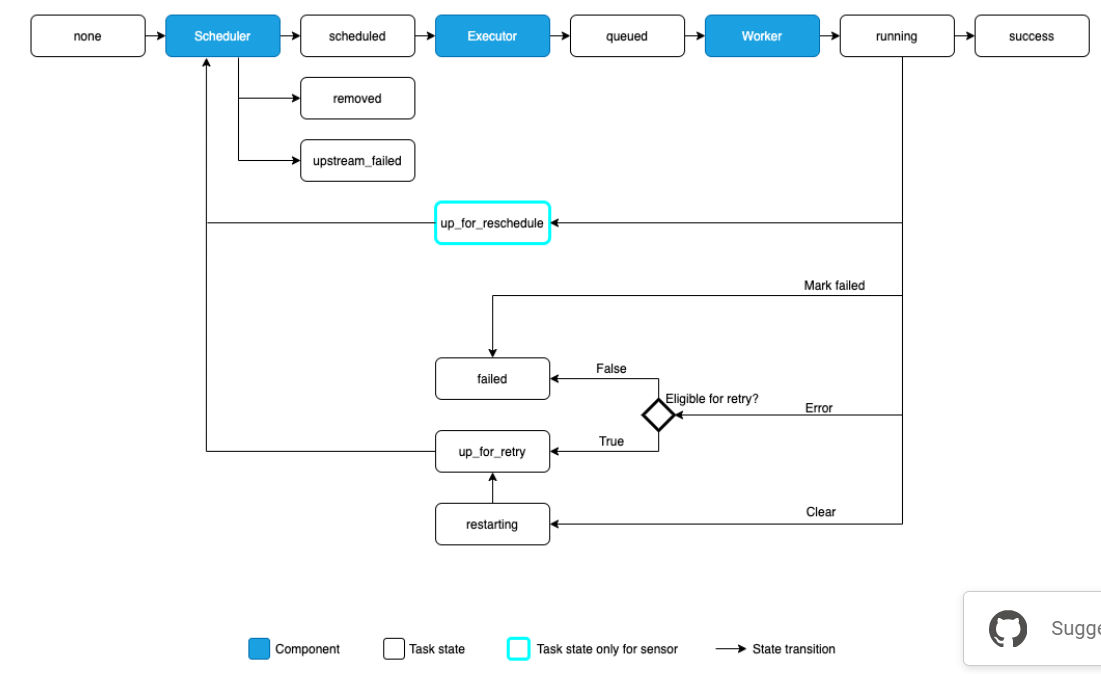

**Queued:**

Tasks are queued when they're ready to be executed but are waiting for available resources or waiting for their dependencies to be met.

**Running:**

Once resources become available and dependencies are satisfied, tasks transition to the running state.
Tasks in this state are actively being executed.

**Success:**

Tasks transition to the success state when they complete successfully without any errors.
This indicates that the task has performed its job as expected.

**Failed:**

If a task encounters an error during execution, it transitions to the failed state.
This indicates that the task has failed to complete its job successfully.

**Upstream Failed:**

If a task depends on other tasks (its upstream tasks) and one or more of those upstream tasks fail, the dependent task transitions to the upstream failed state.
This indicates that the task itself didn't fail, but its dependencies failed, preventing it from being executed.

**Skipped:**

Tasks can be explicitly skipped, either by user intervention or due to certain conditions specified in the workflow.
Tasks in the skipped state are not executed and are marked as skipped in the workflow's execution history.

**Paused:**

If a task or its entire DAG is paused, it will not be scheduled for execution.
This can be useful for temporarily halting the execution of specific tasks or workflows.

**Retrying:**

If a task fails but is configured to retry upon failure, it enters the retrying state.
During this state, Airflow will attempt to rerun the task based on the configured retry settings.

**Up for Retry:**

If a task fails and is configured to retry, but the retry limit has not been reached yet, it goes into the up for retry state.
This indicates that the task will be retried according to the retry policy.

**Queued (for Retry):**

After failing and reaching its retry limit, a task may be queued for retry.
This means that the task is waiting for its retry attempt based on the configured retry policy.

In [ ]:
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from datetime import datetime, timedelta

# Define default arguments for the DAG
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'start_date': datetime(2024, 3, 20),
    'email': ['airflow@example.com'],
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

# Define the DAG
dag = DAG(
    'my_first_dag',
    default_args=default_args,
    description='A simple DAG example',
    schedule_interval=timedelta(days=1),  # Run daily
)

# Task 1: Print current date
task_1 = BashOperator(
    task_id='print_date',
    bash_command='date',
    dag=dag,
)

# Task 2: Sleep for 5 seconds
task_2 = BashOperator(
    task_id='sleep',
    bash_command='sleep 5',
    retries=3,  # Retry this task 3 times upon failure
    dag=dag,
)

# Task 3: Print "Done"
task_3 = BashOperator(
    task_id='print_done',
    bash_command='echo "Done"',
    dag=dag,
)

# Define task dependencies
task_1 >> task_2 >> task_3
